<a href="https://colab.research.google.com/github/wksiazak/Earthquake_classifcation_project/blob/master/Earthquake_Perception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro & goal

It is analysis prepared based on [Earthquake Perception Dataset](https://www.kaggle.com/datasets/antoniocola/earthquake-perception-dataset?resource=download)


Main goal is to analyse data, look for some relations between main features and try to use classification models to predict some features for example "change_of_residence_earthquake" - which is "Willingness to change residence due to an earthquake"


## Import Libraries & Initial data analysis

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from sklearn.metrics import accuracy_score

In [2]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.1 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=a110042a543e404da255896e8a7b5e94eac28da02d11a11f4fdfc2ee77e851e5
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=4695f84fe032ff5037f14781224859a670ef66afb16ded6ff335b594c289cee2
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [3]:
from fancyimpute import KNN

In [4]:
data  = pd.read_csv('Earthquake Perception Dataset.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             456 non-null    float64
 1   sex                             470 non-null    object 
 2   marital_status                  472 non-null    object 
 3   residence                       468 non-null    object 
 4   education                       472 non-null    object 
 5   occupation                      472 non-null    object 
 6   out_of_region_employment        472 non-null    object 
 7   family_members                  472 non-null    object 
 8   family_disabilities             464 non-null    object 
 9   house_floor                     472 non-null    object 
 10  earthquake80                    472 non-null    object 
 11  political_orientation           202 non-null    object 
 12  shocks                          472 

In Classification model we may try to build model which will clasify if particular person will decide to change residence of earthquake?
y  could be "change_of_residence_earthquake"

In [6]:
data.isna().sum().sort_values(ascending = False)

political_orientation             270
salary                            168
vehicle_type                       63
age                                16
family_disabilities                 8
residence                           4
sex                                 2
education                           0
INGV_trust                          0
social_media_info                   0
newspaper_info                      0
app_info                            0
municipal_institutions_trust        0
regional_institutions_trust         0
national_institutions_trust         0
reception_centers                   0
security                            0
radio_info                          0
property_house                      0
housing_type                        0
elevator                            0
n_vehicles                          0
marital_status                      0
end_of_month                        0
TV_info                             0
change_of_residence_earthquake      0
red_zone_fre

In [7]:
data.head()

,age,sex,marital_status,residence,education,occupation,out_of_region_employment,family_members,family_disabilities,house_floor,earthquake80,political_orientation,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region,out_of_region_earthquake,change_of_residence,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
0,21.0,Male,Unmarried,Napoli,Upper Secondary School,Student,No,4,No,1,No,Left,3,2,2,2,3,1,2,Yes,Yes,No,No,No,No,3,4,2,4,4,3,3,3,4,2,No,Yes,Apartment,Yes,0,NaN,1,Up to €15000
1,21.0,Female,Unmarried,Napoli,Upper Secondary School,Student,No,5,No,4,No,Center,1,2,2,1,3,2,4,Yes,Yes,No,Yes,No,Yes,3,2,2,2,2,2,2,2,3,1,No,Yes,Other,Yes,5,Car and Motorcycle,1,Between €28000 and €50000
2,21.0,Female,Unmarried,Napoli,Upper Secondary School,Student Worker,No,5,No,4,No,Left,3,2,2,1,4,2,3,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,2,2,2,5,3,Yes,Yes,Apartment,Yes,0,NaN,1,Between €15000 and €28000
3,23.0,Male,Unmarried,Quarto,Upper Secondary School,Student,No,5,No,2,No,NaN,3,3,3,3,1,3,4,Yes,Yes,Yes,Yes,Yes,Yes,1,1,1,1,1,1,1,1,1,1,No,No,Apartment,No,2,Car,5,Up to €15000
4,64.0,Female,Unmarried,Somma Vesuviana,Degree,Retired,No,1,No,2,Yes,Left,4,4,4,3,2,3,4,Yes,No,No,Yes,Yes,Yes,3,3,3,3,3,2,3,2,4,2,No,No,Apartment,Yes,0,NaN,3,Between €15000 and €28000


In [ ]:
data.describe()

,age,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,n_vehicles,end_of_month
count,456.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,38.872807,2.824153,3.180085,3.364407,2.207627,2.830508,2.921610,3.580508,2.442797,2.489407,2.936441,2.569915,3.201271,2.099576,2.154661,2.065678,3.506356,2.129237,1.506356,2.525424
std,14.358412,1.125279,1.124607,1.202723,1.195935,1.117740,1.397677,1.166537,1.018362,1.038481,1.109784,0.957364,1.048585,0.921920,0.957382,0.936366,0.891075,0.885261,0.990379,1.036177
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,25.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000
50%,37.000000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.500000,2.000000,1.000000,3.000000
75%,50.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.250000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000
max,90.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Our dataset includes few characteristic which described level of trust like: radio_info... till security column.  

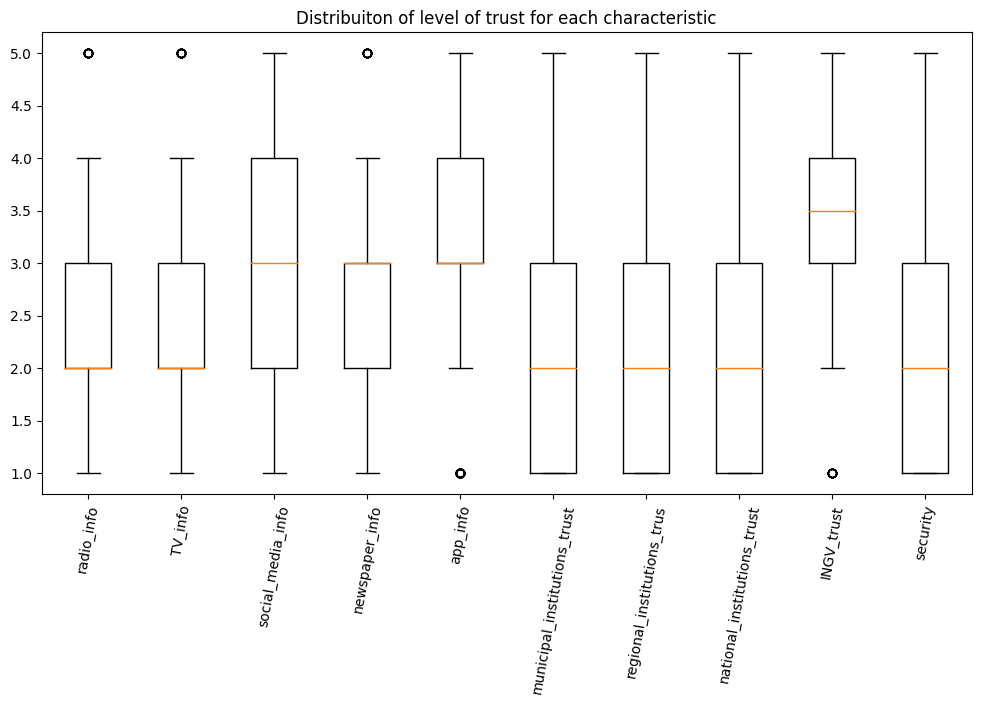

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))

ax.boxplot([data['radio_info'].dropna(),
            data['TV_info'].dropna(),
            data['social_media_info'].dropna(),
            data['newspaper_info'].dropna(),
            data['app_info'].dropna(),
            data['municipal_institutions_trust'].dropna(),
            data['regional_institutions_trust'].dropna(),
            data['national_institutions_trust'].dropna(),
            data['INGV_trust'].dropna(),
            data['security'].dropna()
            ])
ax.set_xticklabels(["radio_info", "TV_info", "social_media_info", "newspaper_info", "app_info","municipal_institutions_trust",
                    "regional_institutions_trus", "national_institutions_trust", "INGV_trust", "security"])

plt.xticks(rotation=80)
plt.title("Distribuiton of level of trust for each characteristic")
plt.show()
#ax.set_ylabel("Siła wiatru")
#ax.set_title('Rozkład siły wiatru w zależności od kategorii pogody')

plt.show()

Based on above chart we can see that the highest median of trust is in INGV_trust which is "Level of trust in the National Institute of Geophysics and Volcanology (INGV)"

<Axes: xlabel='age', ylabel='Density'>

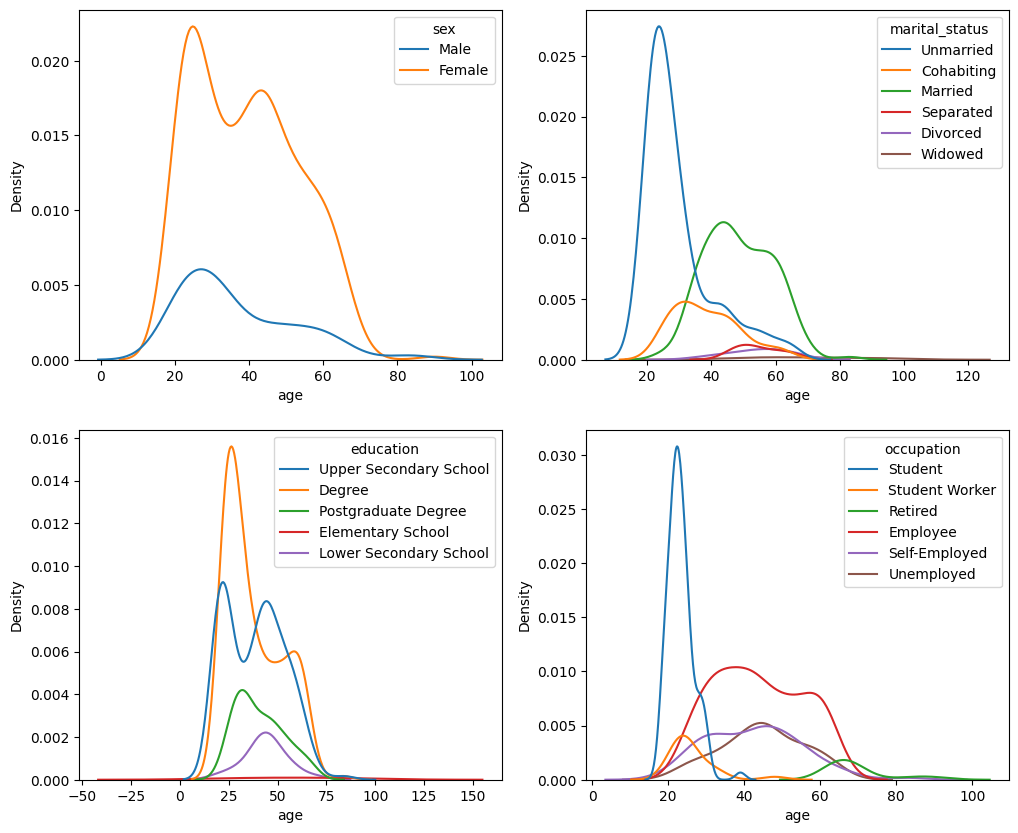

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.kdeplot(data=data, x='age', fill=False, hue = 'sex', ax=axs[0, 0])
sns.kdeplot(data=data, x='age', fill=False, hue = 'marital_status', ax=axs[0, 1])
sns.kdeplot(data=data, x='age', fill=False, hue = 'education', ax=axs[1, 0])
sns.kdeplot(data=data, x='age', fill=False, hue = 'occupation', ax=axs[1, 1])
#plt.xlabel('Temperatura [$^\circ$C]')
#plt.title('Rozkład zmiennej temp_max')

## Filling empty  values

We will fulfill empty data for columns (below are names with number of missing values):

 - political_orientation             270 -> based on fancy imputer
 - salary                            168 -> based on random choice
 - vehicle_type                       63 -> based on random choice imputig
 - age                                16 -> repplacing by mode
 - family_disabilities                 8 -> replaced by most occuring value
 - residence                           4 -> replacing by mode
 - sex                                 2 -> replacing by mode

In [8]:
data.groupby('salary')['salary'].count()

salary
Between €15000 and €28000    104
Between €28000 and €50000     59
Over €50000                   14
Up to €15000                 127
Name: salary, dtype: int64

In [9]:
data.groupby('political_orientation')['political_orientation'].count()

political_orientation
Center     25
Left      148
Right      29
Name: political_orientation, dtype: int64

In [10]:
data[data['sex'].isna()]

,age,sex,marital_status,residence,education,occupation,out_of_region_employment,family_members,family_disabilities,house_floor,earthquake80,political_orientation,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region,out_of_region_earthquake,change_of_residence,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
87,59.0,NaN,Married,Napoli,Degree,Employee,No,5,No,5,No,NaN,3,3,3,2,2,4,3,Yes,Yes,No,Yes,No,No,3,3,2,3,4,2,1,1,3,2,Yes,Yes,Apartment,Yes,4,Car and Motorcycle,3,NaN
344,63.0,NaN,Married,Saviano,Degree,Employee,No,2,No,1,Yes,Right,1,3,2,2,4,3,2,Yes,No,No,Yes,No,No,3,3,3,3,3,2,1,3,5,1,Yes,Yes,Villa/Small Villa,No,2,Car,2,NaN


In [11]:
mode_value = data['sex'].mode()[0]

In [12]:
print(mode_value)

Female


In [13]:
data['sex'].fillna(mode_value, inplace=True)

In [14]:
data[data['residence'].isna()]

,age,sex,marital_status,residence,education,occupation,out_of_region_employment,family_members,family_disabilities,house_floor,earthquake80,political_orientation,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region,out_of_region_earthquake,change_of_residence,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
221,33.0,Male,Married,NaN,Degree,Self-Employed,No,4,No,4,No,Right,2,3,2,1,3,2,4,Yes,No,No,No,No,Yes,3,3,3,3,3,1,1,1,3,1,No,Yes,Apartment,No,1,Car,2,NaN
224,40.0,Female,Married,NaN,Upper Secondary School,Employee,No,4,No,1,No,NaN,2,3,4,2,2,4,4,Yes,Yes,No,Yes,No,No,3,2,1,3,3,4,4,4,4,3,No,No,Apartment,No,2,Car,3,Between €15000 and €28000
425,38.0,Female,Cohabiting,NaN,Upper Secondary School,Employee,No,3,No,0 (Ground Floor),No,Center,3,5,5,1,1,3,5,Yes,No,No,Yes,Yes,Yes,2,2,3,2,2,2,2,1,3,2,No,Yes,Apartment,No,2,Motorcycle/Scooter,3,Up to €15000
437,40.0,Female,Married,NaN,Degree,Employee,No,4,No,5,No,NaN,3,4,5,2,3,4,5,Yes,Yes,Yes,Yes,Yes,Yes,2,1,3,3,5,1,1,2,3,3,No,Yes,Apartment,Yes,1,Car,3,Between €15000 and €28000


In [15]:
mode_value_residence = data['residence'].mode()[0]

In [16]:
print(mode_value_residence)

Napoli


In [17]:
data.groupby('residence')['residence'].count().sort_values(ascending = False)

residence
Napoli             162
Pozzuoli           114
Somma Vesuviana     17
Quarto              15
Qualiano            15
                  ... 
Morcone              1
Mori                 1
Mugnano              1
Boscoreale           1
Poggiomarino         1
Name: residence, Length: 87, dtype: int64

In [18]:
data['residence'].fillna(mode_value_residence, inplace=True)

In [19]:
data.groupby('family_disabilities')['family_disabilities'].count().sort_values(ascending = False)

family_disabilities
No     422
Yes     42
Name: family_disabilities, dtype: int64

In [20]:
data[data['family_disabilities'].isna()]

,age,sex,marital_status,residence,education,occupation,out_of_region_employment,family_members,family_disabilities,house_floor,earthquake80,political_orientation,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region,out_of_region_earthquake,change_of_residence,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
12,22.0,Female,Unmarried,Quarto,Upper Secondary School,Student,No,5,NaN,0 (Ground Floor),No,NaN,2,1,2,2,1,1,2,Yes,Yes,No,Yes,No,Yes,3,3,3,3,3,1,1,1,4,3,No,No,Villa/Small Villa,No,1,Car,3,NaN
49,22.0,Female,Unmarried,Napoli,Upper Secondary School,Student,No,4,NaN,0 (Ground Floor),No,Left,1,3,3,1,2,3,5,Yes,Yes,Yes,Yes,Yes,No,3,3,3,3,3,2,2,1,4,2,Yes,Yes,Apartment,Yes,2,Car,2,Between €15000 and €28000
50,43.0,Female,Unmarried,Napoli,Upper Secondary School,Employee,No,3,NaN,0 (Ground Floor),No,NaN,2,3,4,3,4,4,4,Yes,No,No,No,No,No,2,2,2,2,2,3,3,3,4,4,No,No,Villa/Small Villa,No,3,Car,3,Up to €15000
99,56.0,Female,Cohabiting,Pozzuoli,Lower Secondary School,Unemployed,No,2,NaN,1,Yes,NaN,4,4,4,4,3,4,4,Yes,Yes,No,Yes,Yes,Yes,1,2,3,3,3,2,2,3,3,2,No,No,Apartment,No,0,NaN,4,NaN
132,51.0,Female,Married,Pozzuoli,Degree,Self-Employed,No,Over 5,NaN,1,Yes,NaN,3,3,2,3,3,2,2,Yes,No,No,No,No,Yes,4,4,2,3,4,1,1,2,3,2,Yes,Yes,Apartment,No,1,Car,2,NaN
153,47.0,Female,Married,Napoli,Upper Secondary School,Employee,No,3,NaN,1,Yes,Left,3,3,3,3,3,3,3,Yes,Yes,Yes,Yes,Yes,Yes,2,2,4,3,4,3,2,2,4,3,Yes,Yes,Villa/Small Villa,No,1,Car,3,NaN
242,48.0,Female,Cohabiting,Quarto,Upper Secondary School,Employee,No,2,NaN,1,No,NaN,4,4,4,2,2,1,5,No,No,No,Yes,No,Yes,3,3,5,1,5,1,2,1,3,1,No,No,Apartment,No,1,Car,3,Between €15000 and €28000
433,27.0,Male,Unmarried,Monte Di Procida,Upper Secondary School,Employee,No,5,NaN,0 (Ground Floor),No,Right,3,2,2,3,1,4,4,Yes,Yes,No,Yes,No,Yes,2,2,2,2,3,2,2,3,4,2,Yes,Yes,Apartment,No,2,Car and Motorcycle,2,Between €15000 and €28000


In [21]:
data['family_disabilities'].fillna('No', inplace=True)

In [22]:
data.groupby('age')['age'].count().sort_values(ascending = False)

age
25.0    23
23.0    21
22.0    20
24.0    17
34.0    17
45.0    14
29.0    14
21.0    14
44.0    12
47.0    12
27.0    12
40.0    12
43.0    12
30.0    11
19.0    11
51.0    10
48.0    10
52.0    10
56.0     9
42.0     9
26.0     9
32.0     9
36.0     9
28.0     9
61.0     8
59.0     8
20.0     8
54.0     8
31.0     8
38.0     8
46.0     7
39.0     7
60.0     7
62.0     6
65.0     6
33.0     6
55.0     6
64.0     6
58.0     6
35.0     5
41.0     5
37.0     5
53.0     4
63.0     4
57.0     3
49.0     3
50.0     3
66.0     3
70.0     2
18.0     2
67.0     2
68.0     1
83.0     1
84.0     1
90.0     1
Name: age, dtype: int64

In [23]:
mode_value_age = data['age'].mode()[0]

In [24]:
data['age'].fillna(mode_value_age,  inplace=True)

For missing vaues in  below features:
- political_orientation             270
- salary                            168
- vehicle_type                       63

We will try to fill based on some prediction models.  

In [25]:
data.groupby('vehicle_type')['vehicle_type'].count().sort_values(ascending = False)

vehicle_type
Car                   339
Car and Motorcycle     67
Motorcycle/Scooter      3
Name: vehicle_type, dtype: int64

In [26]:
data['vehicle_type'].isna().sum()

63

random choice imputig for vehicle_type

In [27]:
# Rozkład istniejących wartości
proportions = data['vehicle_type'].value_counts(normalize=True)
print(proportions)

vehicle_type
Car                   0.828851
Car and Motorcycle    0.163814
Motorcycle/Scooter    0.007335
Name: proportion, dtype: float64


https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values

In [28]:
# Funkcja do losowego wyboru wartości na podstawie istniejącego rozkładu
def random_fillna(series, proportions):
    na_indices = series[series.isna()].index
    fill_values = np.random.choice(proportions.index, size=len(na_indices), p=proportions.values)
    series.loc[na_indices] = fill_values
    return series

data['vehicle_type'] = random_fillna(data['vehicle_type'], proportions)

<ipython-input-28-b1cf42b80e3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[na_indices] = fill_values


In [29]:
data['vehicle_type'].isna().sum()

0

In [30]:
data.groupby('salary')['salary'].count().sort_values(ascending = False)

salary
Up to €15000                 127
Between €15000 and €28000    104
Between €28000 and €50000     59
Over €50000                   14
Name: salary, dtype: int64

In [31]:
# Rozkład istniejących wartości
proportions_salary = data['salary'].value_counts(normalize=True)
print(proportions)

vehicle_type
Car                   0.828851
Car and Motorcycle    0.163814
Motorcycle/Scooter    0.007335
Name: proportion, dtype: float64


In [32]:
data['salary'] = random_fillna(data['vehicle_type'], proportions_salary)

<ipython-input-28-b1cf42b80e3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[na_indices] = fill_values


In [33]:
data['salary'].isna().sum()

0

braki na political_orientation  spróbować zza pomocą klasyfikatora lub fancyimputera

In [35]:
# Obliczanie częstości występowania każdej kategorii
freq_encoded = data['political_orientation'].value_counts(normalize=True)

# Zastępowanie wartości w kolumnie 'political_orientation' wartościami z freq_encoded
data['political_orientation'] = data['political_orientation'].map(freq_encoded)

In [36]:
data['political_orientation'].unique()

array([0.73267327, 0.12376238,        nan, 0.14356436])

In [37]:
column_to_impute_political = data[['political_orientation']]

In [38]:
knn_imputer = KNN()

In [39]:
# Zastosowanie KNN imputera do skopiowanej kolumny
imputed_column = knn_imputer.fit_transform(column_to_impute_political)

Imputing row 1/472 with 0 missing, elapsed time: 0.024
Imputing row 101/472 with 1 missing, elapsed time: 0.025
Imputing row 201/472 with 1 missing, elapsed time: 0.025
Imputing row 301/472 with 1 missing, elapsed time: 0.028
Imputing row 401/472 with 1 missing, elapsed time: 0.029
[KNN] Warning: 270/472 still missing after imputation, replacing with 0


In [40]:
# Zastąpienie oryginalnej kolumny imputowanymi wartościami
data['political_orientation'] = imputed_column

In [41]:
data['political_orientation'].unique()

array([0.73267327, 0.12376238, 0.        , 0.14356436])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             472 non-null    float64
 1   sex                             472 non-null    object 
 2   marital_status                  472 non-null    object 
 3   residence                       472 non-null    object 
 4   education                       472 non-null    object 
 5   occupation                      472 non-null    object 
 6   out_of_region_employment        472 non-null    object 
 7   family_members                  472 non-null    object 
 8   family_disabilities             472 non-null    object 
 9   house_floor                     472 non-null    object 
 10  earthquake80                    472 non-null    object 
 11  political_orientation           472 non-null    float64
 12  shocks                          472 

## Encoding - converting on numeric values

In [43]:
# Identyfikacja kolumn typu object
object_columns = data.select_dtypes(include='object').columns
print(f"\nColumns of type object: {object_columns}")


Columns of type object: Index(['sex', 'marital_status', 'residence', 'education', 'occupation',
       'out_of_region_employment', 'family_members', 'family_disabilities',
       'house_floor', 'earthquake80', 'abroad', 'out_of_region',
       'out_of_region_earthquake', 'change_of_residence',
       'change_of_residence_earthquake', 'red_zone_frequency',
       'reception_centers', 'property_house', 'housing_type', 'elevator',
       'vehicle_type', 'salary'],
      dtype='object')


In [44]:
# Inicjalizacja LabelEncoder
label_encoders = {}

# Kodowanie wartości kategorycznych
for col in object_columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             472 non-null    float64
 1   sex                             472 non-null    int64  
 2   marital_status                  472 non-null    int64  
 3   residence                       472 non-null    int64  
 4   education                       472 non-null    int64  
 5   occupation                      472 non-null    int64  
 6   out_of_region_employment        472 non-null    int64  
 7   family_members                  472 non-null    int64  
 8   family_disabilities             472 non-null    int64  
 9   house_floor                     472 non-null    int64  
 10  earthquake80                    472 non-null    int64  
 11  political_orientation           472 non-null    float64
 12  shocks                          472 

In [46]:
data['change_of_residence_earthquake'].unique()

array([0, 1])

## Correlation check

In [47]:
data_corr = data.corr()

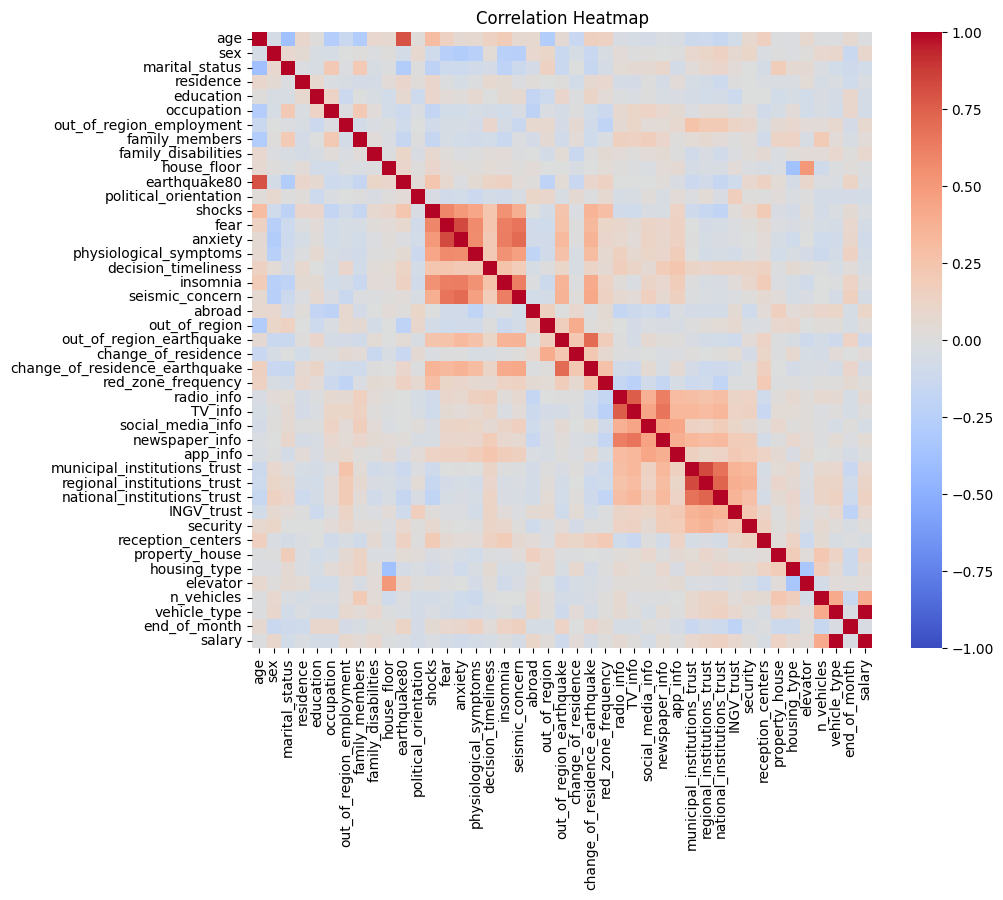

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Dodanie tytułu
plt.title('Correlation Heatmap')
plt.show()

Let's now split the data into train and test set.

In [49]:
# zdefiniowanie zmiennych X i y do modelu
y = data.pop('change_of_residence_earthquake')
X = data

In [50]:
y.shape

(472,)

In [51]:
y.value_counts()

change_of_residence_earthquake
0    273
1    199
Name: count, dtype: int64

It looks like we have quite balanaced data. 199 is willing to move due to earthquake and 273 no.  

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Logistic Regression model

In [53]:
# inicjalizacja regresji logistycznej
model = LogisticRegression()
# trenowanie modelu
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
y_pred = model.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        53
           1       0.87      0.81      0.84        42

    accuracy                           0.86        95
   macro avg       0.86      0.86      0.86        95
weighted avg       0.86      0.86      0.86        95



Feature: 0, Score: -0.00670
Feature: 1, Score: 0.13750
Feature: 2, Score: -0.20445
Feature: 3, Score: -0.00176
Feature: 4, Score: -0.01894
Feature: 5, Score: -0.01122
Feature: 6, Score: 0.00496
Feature: 7, Score: 0.01112
Feature: 8, Score: -0.54761
Feature: 9, Score: -0.14996
Feature: 10, Score: 0.28710
Feature: 11, Score: -0.09530
Feature: 12, Score: 0.21201
Feature: 13, Score: -0.15330
Feature: 14, Score: -0.01515
Feature: 15, Score: 0.22329
Feature: 16, Score: -0.01049
Feature: 17, Score: 0.09843
Feature: 18, Score: 0.43475
Feature: 19, Score: -0.68541
Feature: 20, Score: -1.54458
Feature: 21, Score: 3.85234
Feature: 22, Score: 1.19932
Feature: 23, Score: 0.87160
Feature: 24, Score: -0.65233
Feature: 25, Score: 0.06806
Feature: 26, Score: 0.14081
Feature: 27, Score: -0.05023
Feature: 28, Score: 0.06239
Feature: 29, Score: 0.33463
Feature: 30, Score: -0.40045
Feature: 31, Score: -0.05392
Feature: 32, Score: -0.02952
Feature: 33, Score: -0.20051
Feature: 34, Score: 0.46079
Feature: 35

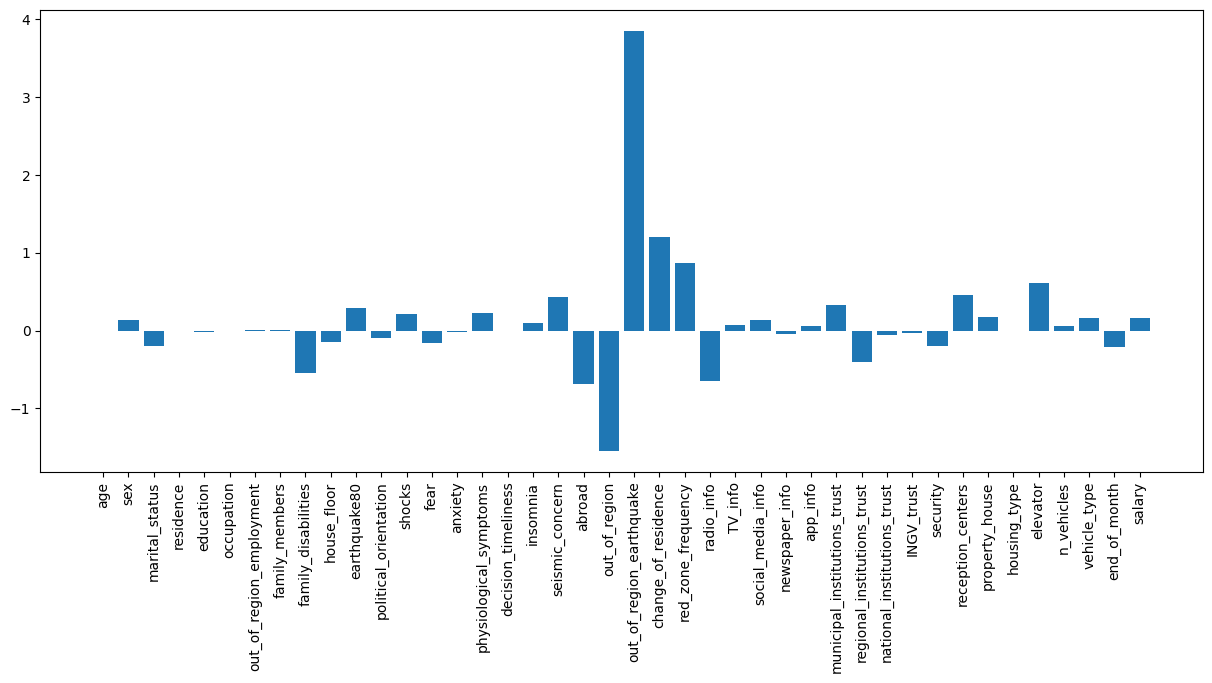

In [57]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15, 6))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.show()

out_of_region_earthquake means "Whether the participant works or studies outside the Campania region"

## SVM linear

In [58]:
svm_lin = SVC(kernel='linear')
svm_lin.fit(X,y)
pred_lin = svm_lin.predict(X)

In [60]:
print(classification_report(y, pred_lin))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       273
           1       0.90      0.82      0.86       199

    accuracy                           0.89       472
   macro avg       0.89      0.88      0.88       472
weighted avg       0.89      0.89      0.88       472



In [61]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X,y)
pred_poly = svm_poly.predict(X)

In [62]:
print(classification_report(y, pred_poly))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       273
           1       0.75      0.52      0.62       199

    accuracy                           0.73       472
   macro avg       0.73      0.70      0.70       472
weighted avg       0.73      0.73      0.72       472



In [63]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X,y)
pred_rbf = svm_rbf.predict(X)

In [64]:
print(classification_report(y, pred_rbf))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       273
           1       0.68      0.60      0.63       199

    accuracy                           0.71       472
   macro avg       0.70      0.69      0.70       472
weighted avg       0.71      0.71      0.71       472



SVM **linear** is giving the best accuracy

## Naive Bayes

In [65]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [66]:
y_pred_mnb= mnb.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        53
           1       0.80      0.86      0.83        42

    accuracy                           0.84        95
   macro avg       0.84      0.84      0.84        95
weighted avg       0.84      0.84      0.84        95



In [68]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [69]:
y_pred_gnb = gnb.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87        53
           1       0.82      0.88      0.85        42

    accuracy                           0.86        95
   macro avg       0.86      0.87      0.86        95
weighted avg       0.87      0.86      0.86        95



In [71]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [72]:
y_pred_bnb = bnb.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred_bnb))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        53
           1       0.87      0.81      0.84        42

    accuracy                           0.86        95
   macro avg       0.86      0.86      0.86        95
weighted avg       0.86      0.86      0.86        95



## Bagging and Boosting

In [74]:
bagging_model_svm = BaggingClassifier(base_estimator = SVC(), n_estimators=10, random_state=123)

In [75]:
bagging_model_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), random_state=123)

In [76]:
y_pred_test_bag_svm = bagging_model_svm.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred_test_bag_svm))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        53
           1       0.00      0.00      0.00        42

    accuracy                           0.56        95
   macro avg       0.28      0.50      0.36        95
weighted avg       0.31      0.56      0.40        95



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
model_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [79]:
y_pred_train_xb = model_xgb.predict(X_train)
y_pred_test_xb = model_xgb.predict(X_test)

In [80]:
print('Accuracy on train data set: ', accuracy_score(y_train, y_pred_train_xb))
print('Accuracy na test data set: ', accuracy_score(y_test, y_pred_test_xb))

Accuracy on train data set:  0.9734748010610079
Accuracy na test data set:  0.8631578947368421


In [81]:
print(classification_report(y_test, y_pred_test_xb))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        53
           1       0.84      0.86      0.85        42

    accuracy                           0.86        95
   macro avg       0.86      0.86      0.86        95
weighted avg       0.86      0.86      0.86        95



In [82]:
gb = GradientBoostingClassifier(n_estimators=10, random_state=0, learning_rate=1.0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=10, random_state=0)

In [83]:
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)

In [ ]:
print('Accuracy on train data set: ', accuracy_score(y_train, y_pred_train_gb))
print('Accuracy on test data set: ', accuracy_score(y_test, y_pred_test_gb))

Accuracy on train data set:  0.986737400530504
Accuracy on test data set:  0.8736842105263158


In [84]:
print(classification_report(y_test, y_pred_test_gb))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.86      0.86      0.86        42

    accuracy                           0.87        95
   macro avg       0.87      0.87      0.87        95
weighted avg       0.87      0.87      0.87        95



Zrobić przed modelami jeszcze klasteryzacje, feature importance, żeby trochę lepiej poznać dane.  

## Clustering - K-means

In [85]:
model_kmeans = KMeans(n_clusters=5)
model_kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [86]:
ks = range(1, 10)
inertias = []

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(data)
  # wyliczanie sse dla każdego modelu
  inertias.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

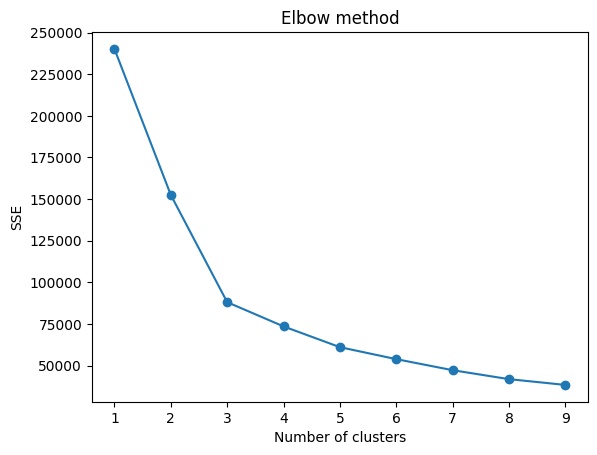

In [87]:
fig, ax = plt.subplots()
ax.plot(ks, inertias, '-o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('SSE')
ax.set_xticks(ks)
plt.title('Elbow method')
plt.show()

In [88]:
# silhouette score
ks = range(2, 6)
sil = []

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(data)
  labels = model.predict(data)
  # wyliczanie miary Silhouette dla każdego modelu
  score = silhouette_score(data, labels)
  sil.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


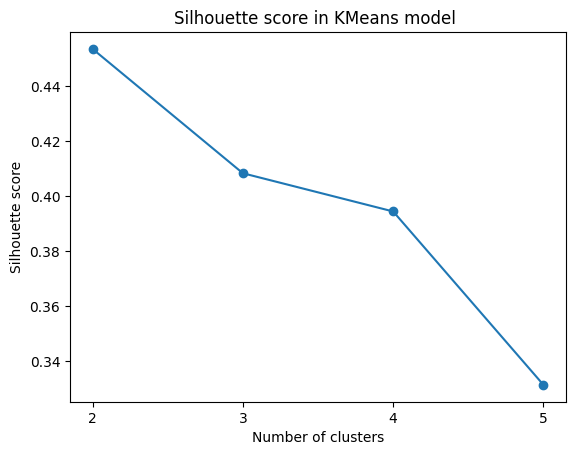

In [89]:
fig, ax = plt.subplots()
ax.plot(ks, sil, '-o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')
ax.set_xticks(ks)
plt.title("Silhouette score in KMeans model ")
plt.show()